## Pokemon Data Mining Project Information-

This is about data mining on pokemon video game database. Pokemon is owned by Nintendo,Game freak, and Creatures, originally released in 1996. But as it got popular throughout the time after debuting as Role playing game, they have done TV shows, manga comics, video games and many others. One of the examples would be the ongoing Pokemon GO at this day which is very famous. 

The dataset used in this project is based on features and stats of pokemon known in RPGs. It includes seven generations of pokemon that was published but does not include any latest generation beyond this. Before going into project part, i will provide link for dataset that is used for this project. It is from https://www.kaggle.com/datasets/alopez247/pokemon. This project is done on my own but the dataset is owned by Asier López Zorrilla. So any credits will go to the author for anything related to dataset.

## Pokemon Data Mining-

Basically this project is simply focused on overall strength and compares it with those of that have MegaEvolution for predicting if their performance are better or worse or maybe even similar. Steps followed for this process are-

1- Data Pre Processing

2- Feature Selection

3- Train Test Split

4- Machine Learning Algorithm

5- Model Training and Evaluation

6- Model Prediction

In [1]:
# Import python libraries required for various coding execution

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the Data from csv file
df= pd.read_csv('pokemon_alopez247.csv')

In [3]:
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [4]:
# Confirming the shape of dataset

df.shape

(721, 23)

In [5]:
# Checking for number of distinct values 
df.nunique()

Number              721
Name                721
Type_1               18
Type_2               18
Total               183
HP                   94
Attack              100
Defense              97
Sp_Atk               94
Sp_Def               90
Speed               101
Generation            6
isLegendary           2
Color                10
hasGender             2
Pr_Male               7
Egg_Group_1          15
Egg_Group_2          13
hasMegaEvolution      2
Height_m             50
Weight_kg           398
Catch_Rate           33
Body_Style           14
dtype: int64

In [6]:
#cleaning of data
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [7]:
df['Type_2']=df['Type_2'].fillna(0)

In [8]:
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2                0
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [9]:
df[['Pr_Male','Egg_Group_2']]=df[['Pr_Male','Egg_Group_2']].fillna(0)

In [10]:
#data is cleaned
df.isnull().sum()

Number              0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

In [11]:
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,0,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,0,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,0.000,Undiscovered,0,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,0.000,Undiscovered,0,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,0.000,Undiscovered,0,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,0.000,Undiscovered,0,False,0.51,9.0,3,head_only


In [12]:
df['Generation']

0      1
1      1
2      1
3      1
4      1
      ..
716    6
717    6
718    6
719    6
720    6
Name: Generation, Length: 721, dtype: int64

In [13]:
# Feature Selection for x and y
x= df[['HP','Attack','Defense','Speed','Sp_Atk','Sp_Def']]

In [14]:
y= df['hasMegaEvolution']

In [15]:
x['Overall_Strength'] = x['Attack'] + x['Defense'] + x['Speed'] + x['Sp_Atk'] + x['Sp_Def'] + x['HP']


C:\Users\IIJet\AppData\Local\Temp\ipykernel_30716\516940757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Overall_Strength'] = x['Attack'] + x['Defense'] + x['Speed'] + x['Sp_Atk'] + x['Sp_Def'] + x['HP']


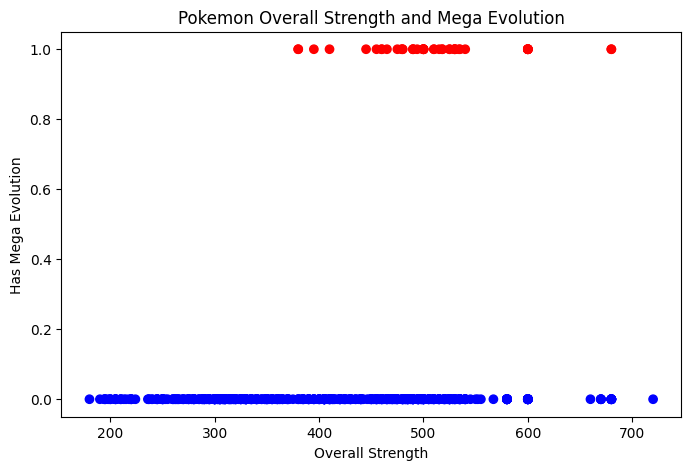

In [16]:
# Convert 'hasMegaEvolution' column to numerical values
y1 = y.astype(int)

plt.figure(figsize=(8,5))
plt.scatter(x['Overall_Strength'], y1, c= y1,cmap= 'bwr',marker='o')
plt.xlabel('Overall Strength')
plt.ylabel('Has Mega Evolution')
plt.title('Pokemon Overall Strength and Mega Evolution')

plt.show()

In [17]:
x.head()

,HP,Attack,Defense,Speed,Sp_Atk,Sp_Def,Overall_Strength
0,45,49,49,45,65,65,318
1,60,62,63,60,80,80,405
2,80,82,83,80,100,100,525
3,39,52,43,65,60,50,309
4,58,64,58,80,80,65,405


In [18]:
y1.head()

0    0
1    0
2    1
3    0
4    0
Name: hasMegaEvolution, dtype: int32

In [19]:
# Import train test split from sci-kit learn
from sklearn.model_selection import train_test_split

x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.2,random_state=42)

In [20]:
# Checking test data for x and y1 ( I have used y1 but it can be simply y as well or anything like y2 it doesn't matter)
x_test.shape

(145, 7)

In [21]:
y1_test.shape

(145,)

In [22]:
#Import Machine learning Algorithm from sci-kit learn

from sklearn.linear_model import LogisticRegression

In [23]:
# Define the class weights
class_weights = {0: 1, 1: 10}  # Assign higher weight to the minority class (1)

In [24]:
# Create the Logistic Regression model with class weights
model = LogisticRegression(class_weight=class_weights)

model.fit(x_train,y1_train)

LogisticRegression(class_weight={0: 1, 1: 10})

In [25]:
x_test

,HP,Attack,Defense,Speed,Sp_Atk,Sp_Def,Overall_Strength
259,100,110,90,60,85,90,535
658,38,36,38,57,32,36,237
77,65,100,70,105,80,80,500
65,70,80,50,35,35,35,305
81,50,60,95,70,120,70,465
...,...,...,...,...,...,...,...
426,55,66,44,85,44,56,350
136,65,60,70,40,85,75,395
265,50,35,55,15,25,25,205
6,44,48,65,43,50,64,314


In [26]:
y1_test

259    1
658    0
77     0
65     0
81     0
      ..
426    0
136    0
265    0
6      0
469    0
Name: hasMegaEvolution, Length: 145, dtype: int32

In [27]:
# Predicting model for test data on x
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [28]:
# Model prediction through probability on x test data
model.predict_proba(x_test)

array([[0.53031497, 0.46968503],
       [0.96156856, 0.03843144],
       [0.32053479, 0.67946521],
       [0.94245014, 0.05754986],
       [0.53461175, 0.46538825],
       [0.5377392 , 0.4622608 ],
       [0.57487293, 0.42512707],
       [0.98376975, 0.01623025],
       [0.41108485, 0.58891515],
       [0.6833246 , 0.3166754 ],
       [0.51199983, 0.48800017],
       [0.89001818, 0.10998182],
       [0.43315352, 0.56684648],
       [0.68181569, 0.31818431],
       [0.93116286, 0.06883714],
       [0.45616476, 0.54383524],
       [0.90541133, 0.09458867],
       [0.93945316, 0.06054684],
       [0.4761818 , 0.5238182 ],
       [0.33088976, 0.66911024],
       [0.60128389, 0.39871611],
       [0.91354389, 0.08645611],
       [0.69099936, 0.30900064],
       [0.30836057, 0.69163943],
       [0.792317  , 0.207683  ],
       [0.76921173, 0.23078827],
       [0.98934345, 0.01065655],
       [0.96117001, 0.03882999],
       [0.92893187, 0.07106813],
       [0.97056135, 0.02943865],
       [0.

In [29]:
# Storing model prediction test data in predictions variable

predictions = model.predict(x_test)

In [30]:
# Importing precision score from sci-kit learn metrics for evaluation

from sklearn.metrics import precision_score

precision = precision_score(y1_test, predictions)
print("Precision:", precision)

Precision: 0.15625


In [31]:
# Checking accuracy of model
model.score(x_test,y1_test)

0.7931034482758621

In [32]:
model.score(x_train,y1_train)

0.7604166666666666

In [33]:
# This attribute is used to access weights for linear model
model.coef_

array([[-0.03017304,  0.02076245,  0.00190656,  0.01013574,  0.00419311,
         0.00297446,  0.00979928]])

In [34]:
# This is used for accessing intercept of linear model
model.intercept_

array([-6.03443759])

In [35]:
# Importing math function
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [36]:
# Defining prediction function for the comparison
def prediction_function(Attack,hasMegaEvolution, coefficients, intercept):
    z = np.sum(Attack * coefficients) + intercept
    y = sigmoid(z)
    
    if hasMegaEvolution == 1:
    
        y *= 1.5
    
    return y


In [37]:
# Model Prediction through prediction function method

prediction_function(58,1,model.coef_[0], model.intercept_[0])

0.011112415738115382